<a href="https://colab.research.google.com/github/piquelab/popgen-notes/blob/master/colab/track_alleles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loss of heterozygosity due to drift
---

This google colab is created from Graham Coop code [here](https://github.com/cooplab/popgen-notes/blob/master/Rcode/track_alleles.R)

In [1]:
track_lineages<-function(N.vec, n.iter, num.tracked, col.allele,return.tracked=FALSE){
	offset<-0.2
num.gens<-length(N.vec)
for(iter in 1:n.iter){
	N.max<-max(N.vec)
	N<-N.vec[num.gens]
	N.prev<-N.vec[num.gens-1]
	plot(c(1,num.gens),c(1,N.max),type="n",axes=FALSE,xlab="",ylab="")
	mtext(side=1,line=1,"Generations")

	track.this.allele<-vector("list", 2*N)
	track.this.allele.time<-list()
	track.this.allele[sample(1:(2*N),num.tracked)]<-1:num.tracked

	track.this.allele.next.gen<-vector("list", 2*N.prev)

	for(i in num.gens:2){
		if(return.tracked) track.this.allele.time[[i]]<-track.this.allele
		N<-N.vec[i]
		N.prev<-N.vec[i-1]
		track.this.allele.next.gen<-vector("list", 2*N.prev)
	for(ind in 1:N){

			par<-sample(1:N.prev,2,replace=FALSE)
			which.allele<-sample(c(-1,1),1)
			lines(c(i,i-1), c(ind-offset,par[1]+which.allele*offset),col="light grey",lwd=0.5)
			if(!is.null(track.this.allele[[2*ind-1]])){
				this.one<-2*par[1] +ifelse(which.allele==1,0,-1);
				track.this.allele.next.gen[[this.one]]  <- c(track.this.allele.next.gen[[this.one]],track.this.allele[[2*ind-1]])
				}

			which.allele<-sample(c(-1,1),1)
			lines(c(i,i-1), c(ind+offset,par[2]+which.allele*offset),col="light grey",lwd=0.5)
			if(!is.null(track.this.allele[[2*ind]])){
						this.one<-2*par[2] +ifelse(which.allele==1,0,-1);
				track.this.allele.next.gen[[ this.one]]  <- c(track.this.allele.next.gen[[this.one]],track.this.allele[[2*ind]])
				}
	#		recover()
		}
		for(this.allele in 1:num.tracked){
			daughter<-which(sapply(track.this.allele,function(allele){any(allele==this.allele)}))
			parent<-which(sapply(track.this.allele.next.gen,function(allele){any(allele==this.allele)}))
			lines(c(i,i-1), c(ceiling(daughter/2)+offset* ifelse(daughter %% 2,-1,1) ,ceiling(parent/2) + offset*ifelse(parent %% 2,-1,1) ),col=col.allele[this.allele],lwd=2)
			}

		points(rep(i,N),1:N+offset, pch=19,cex=1)
		points(rep(i,N),1:N-offset, pch=19,cex=1)
		 track.this.allele<-track.this.allele.next.gen
		}


 	}
	if(return.tracked) track.this.allele.time
}



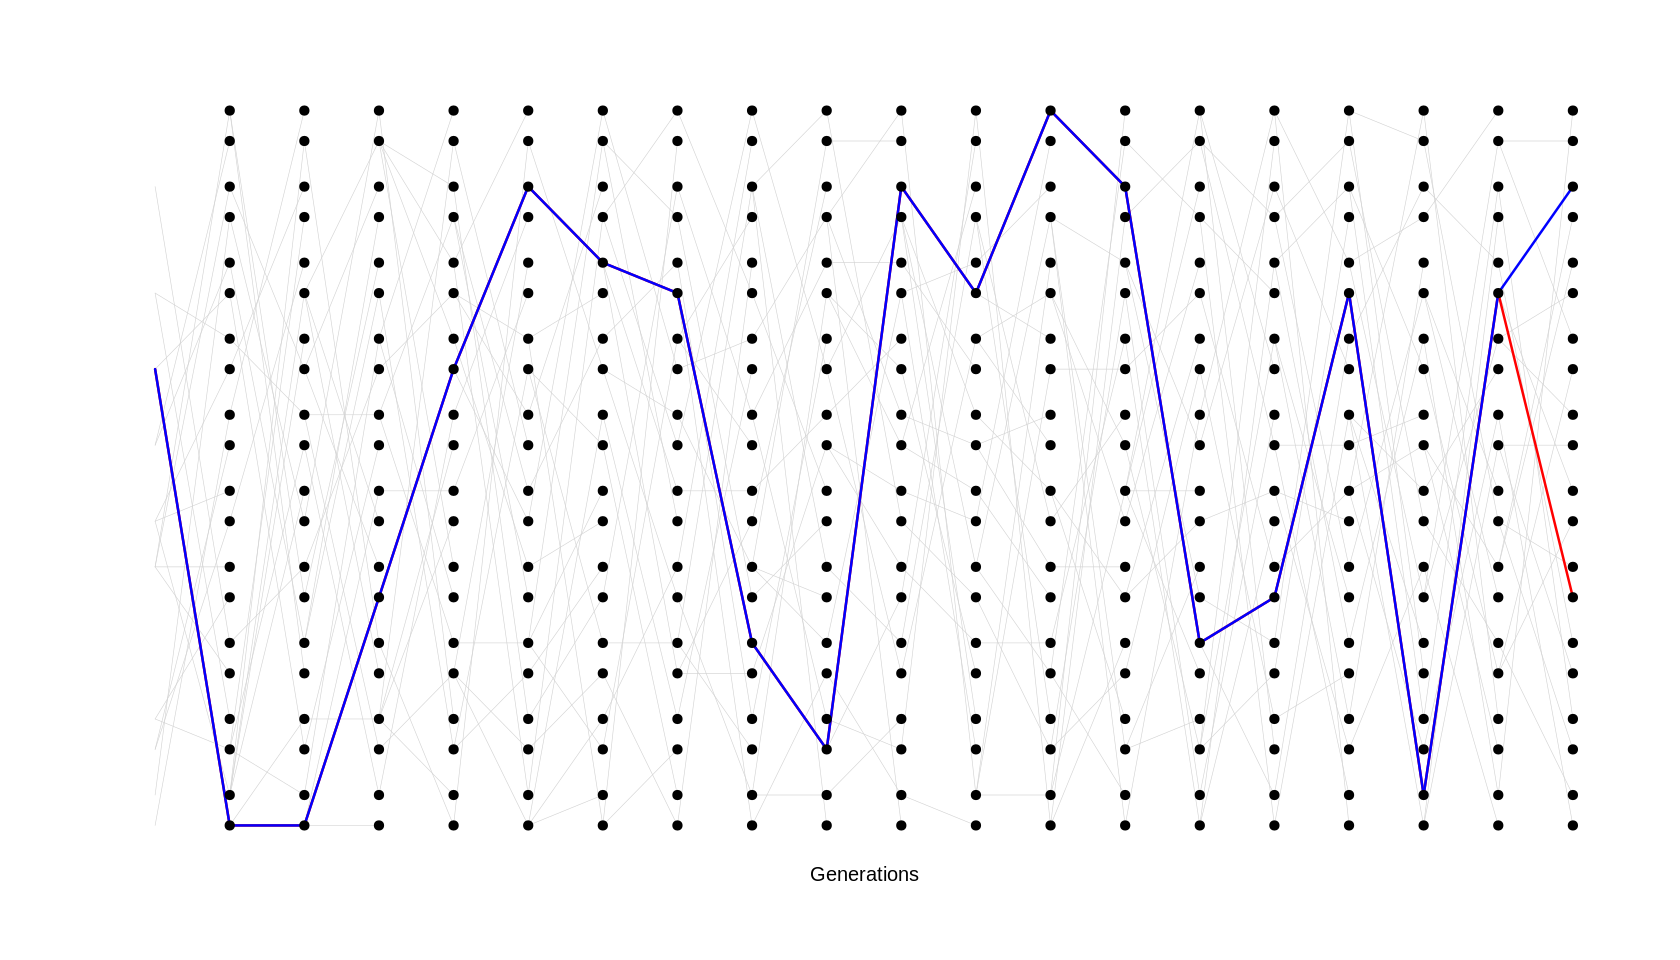

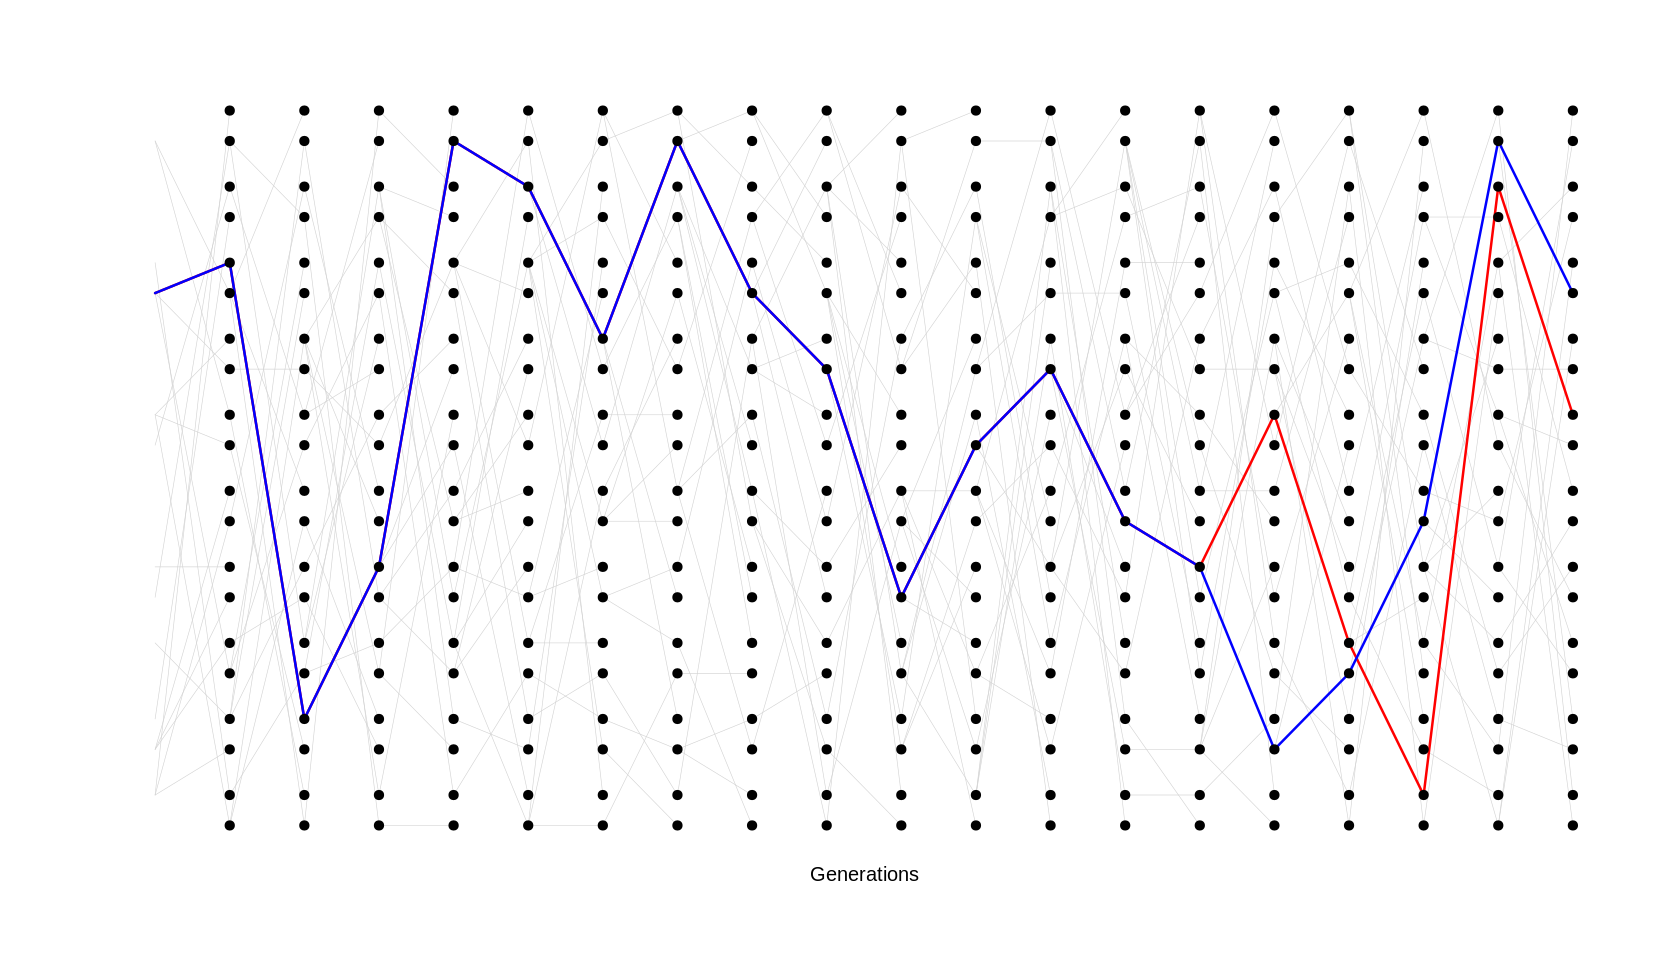

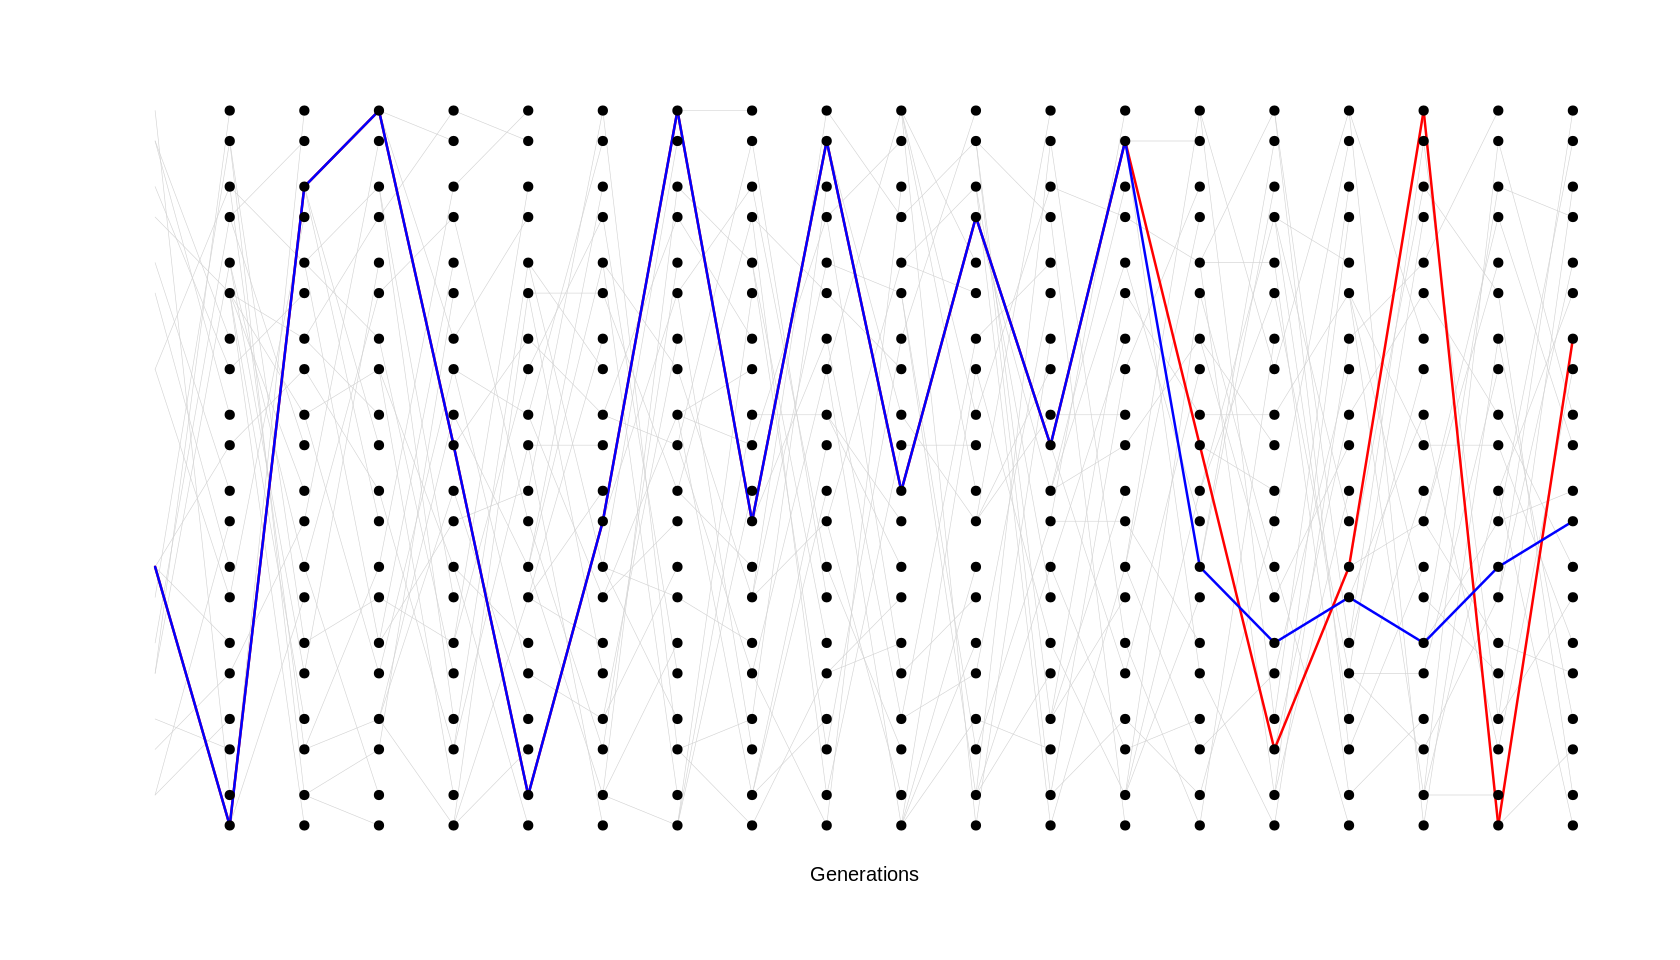

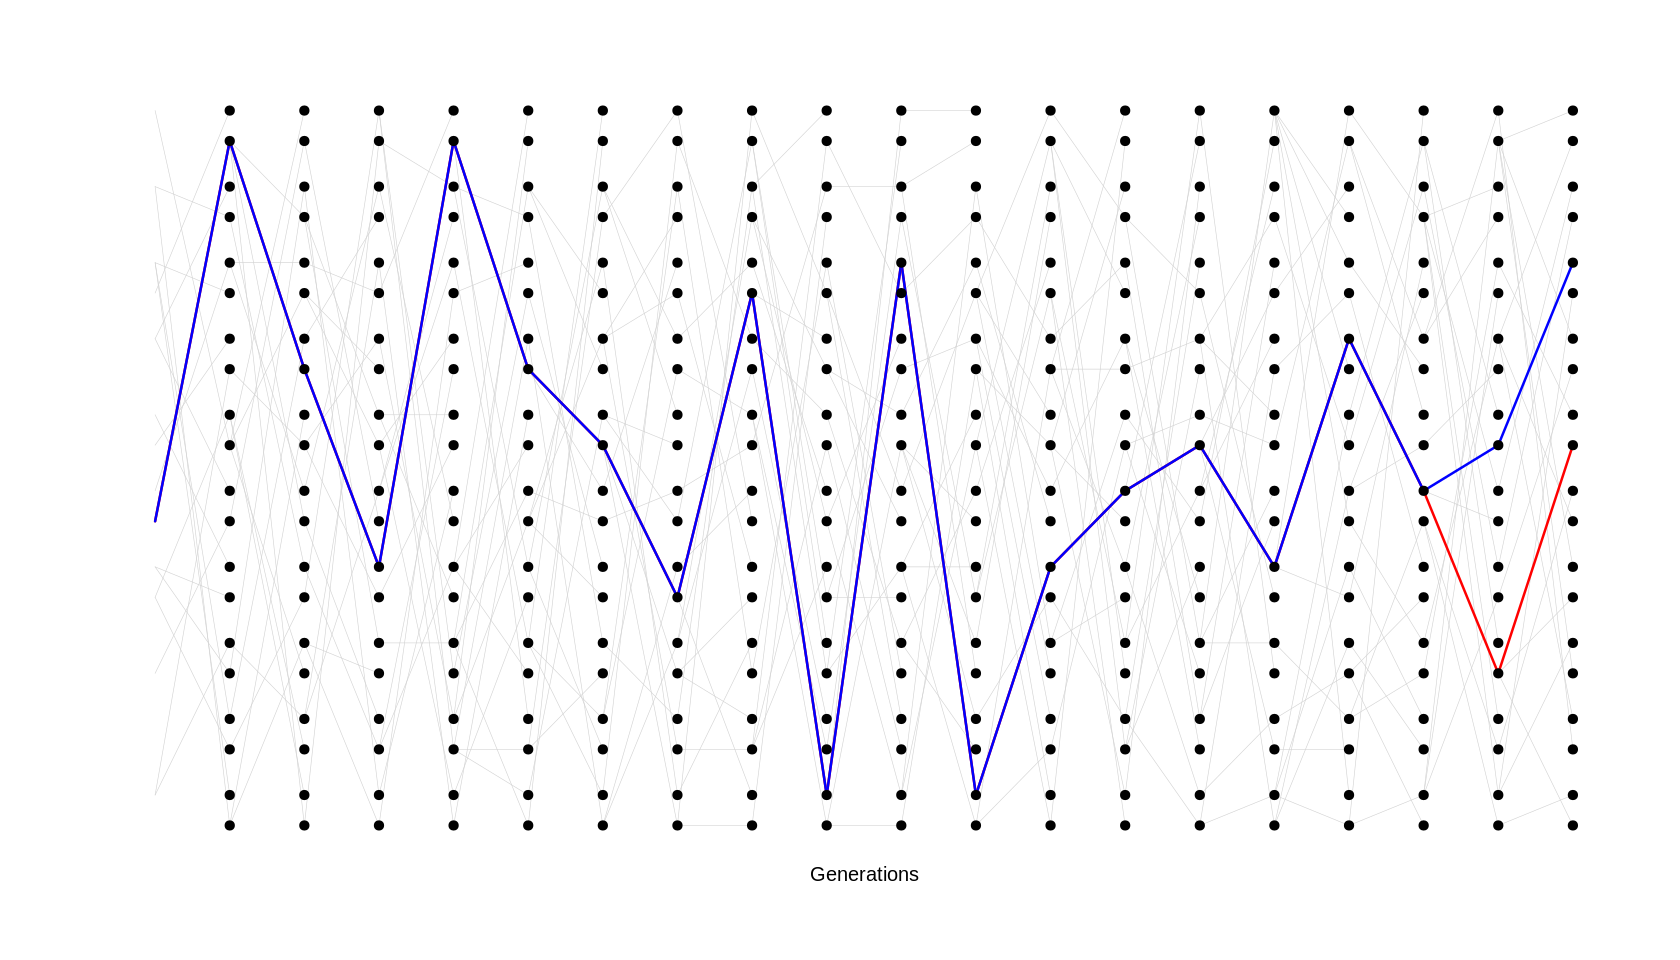

In [7]:
N<-10

###Track pairs
options(repr.plot.width=14, repr.plot.height=8)
track_lineages(N.vec=rep(10,20), n.iter=4, num.tracked=2, col.allele=c("red","blue"))
###OR

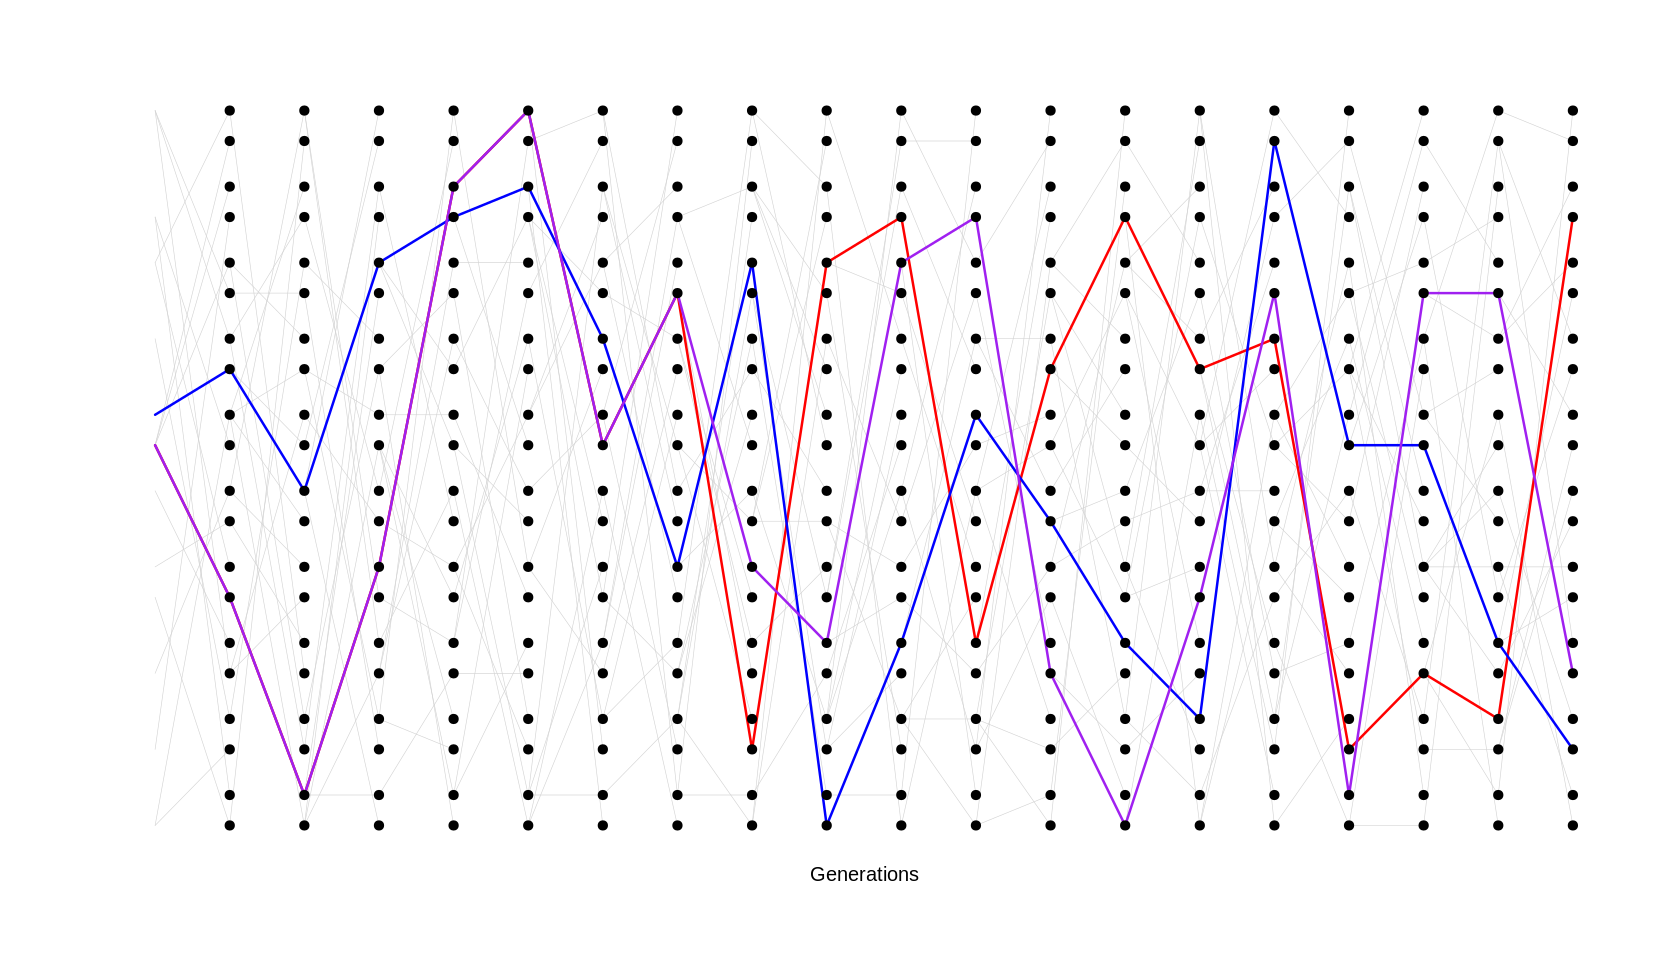

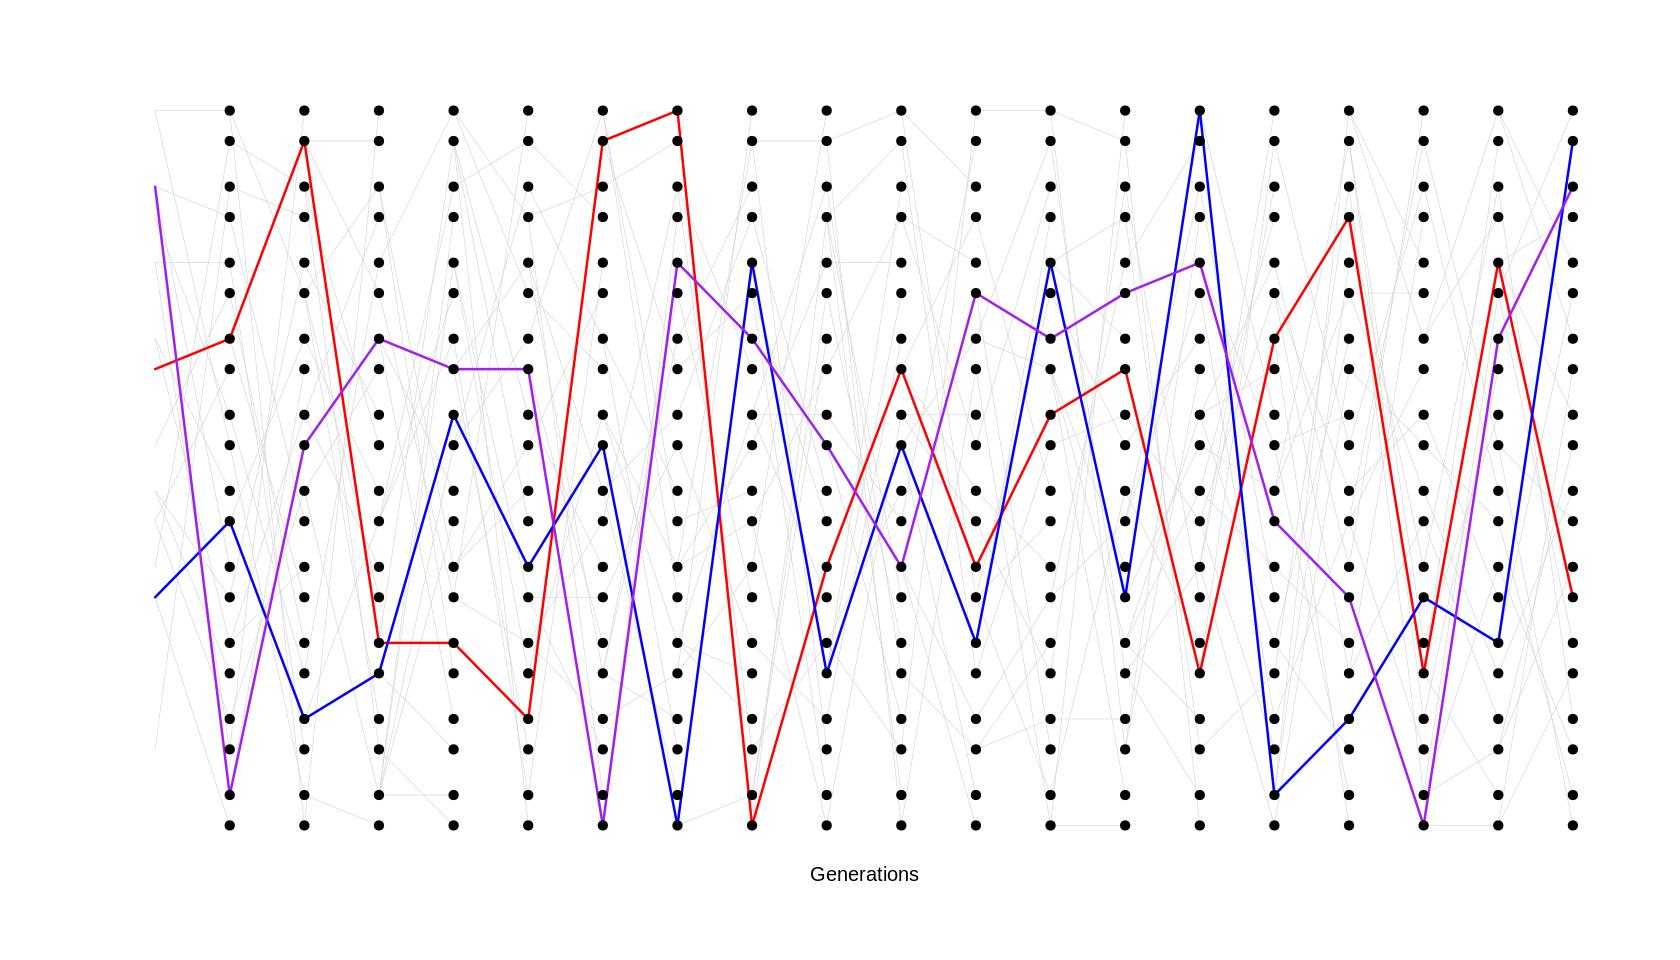

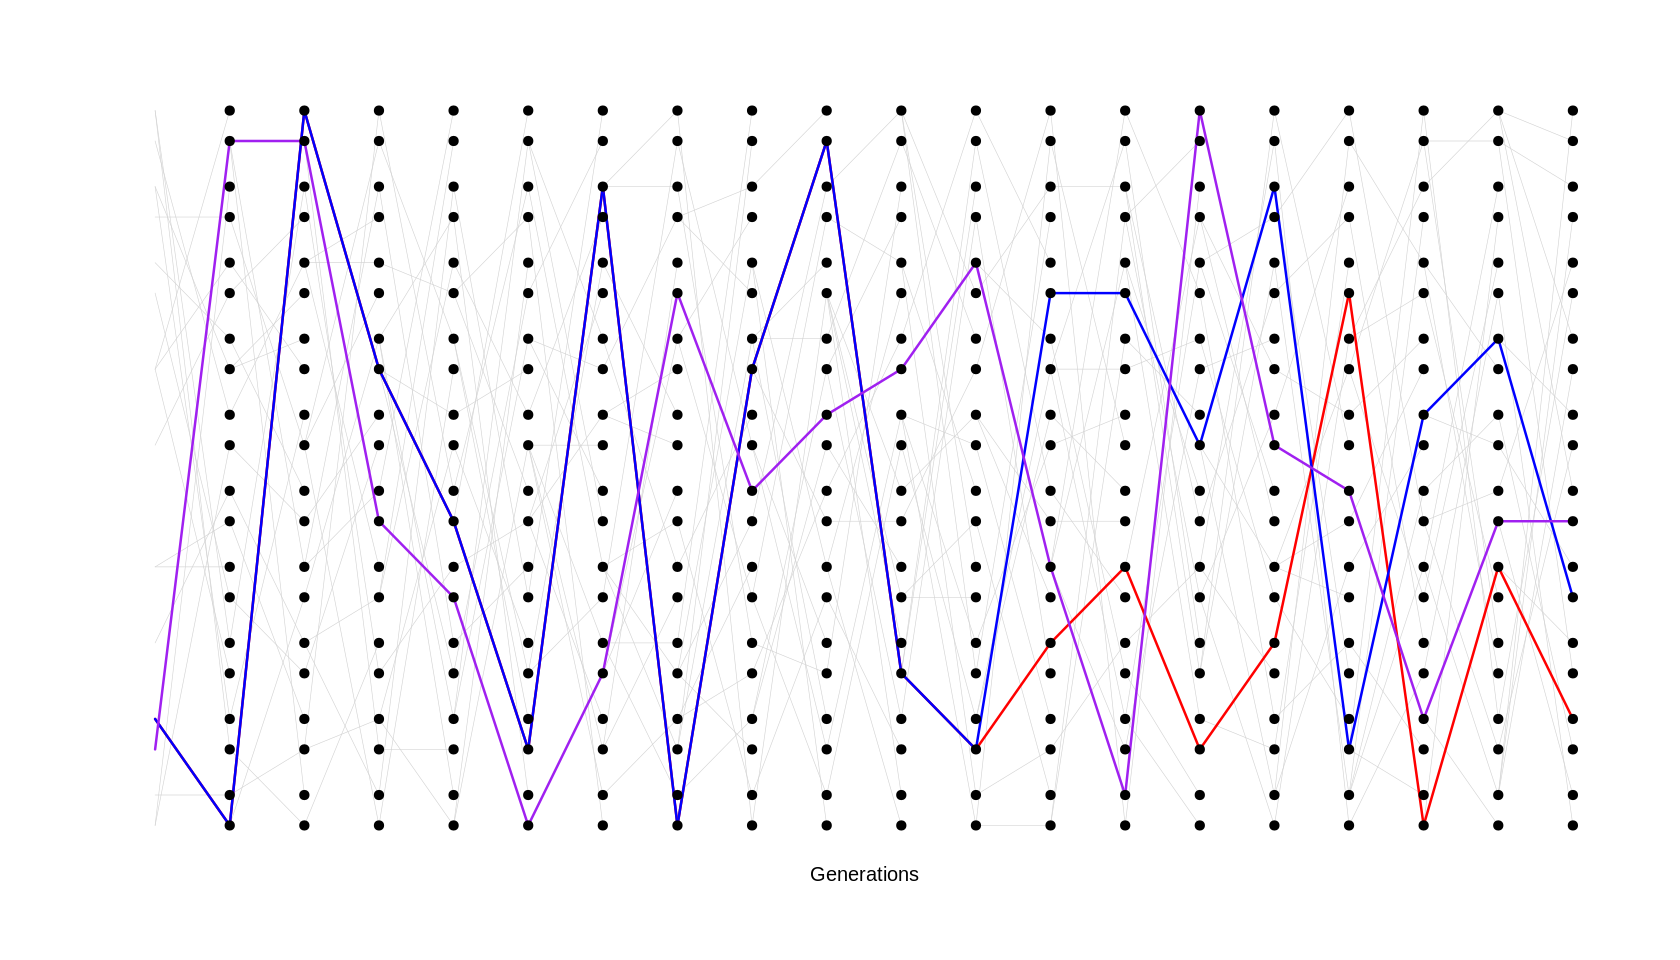

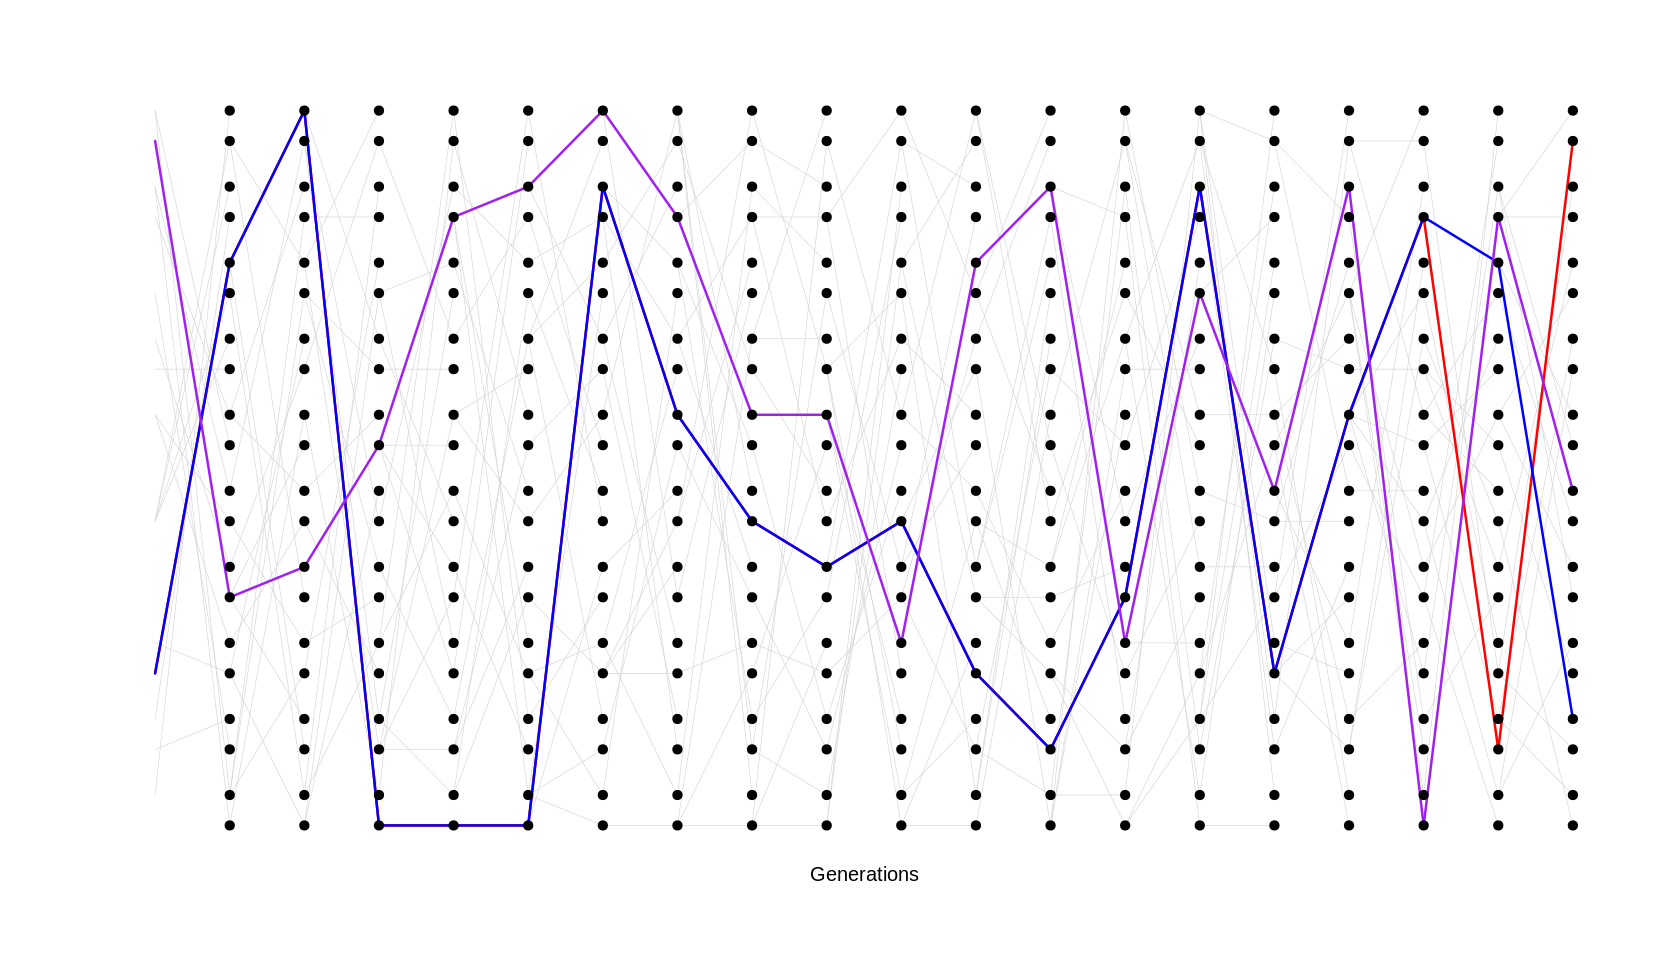

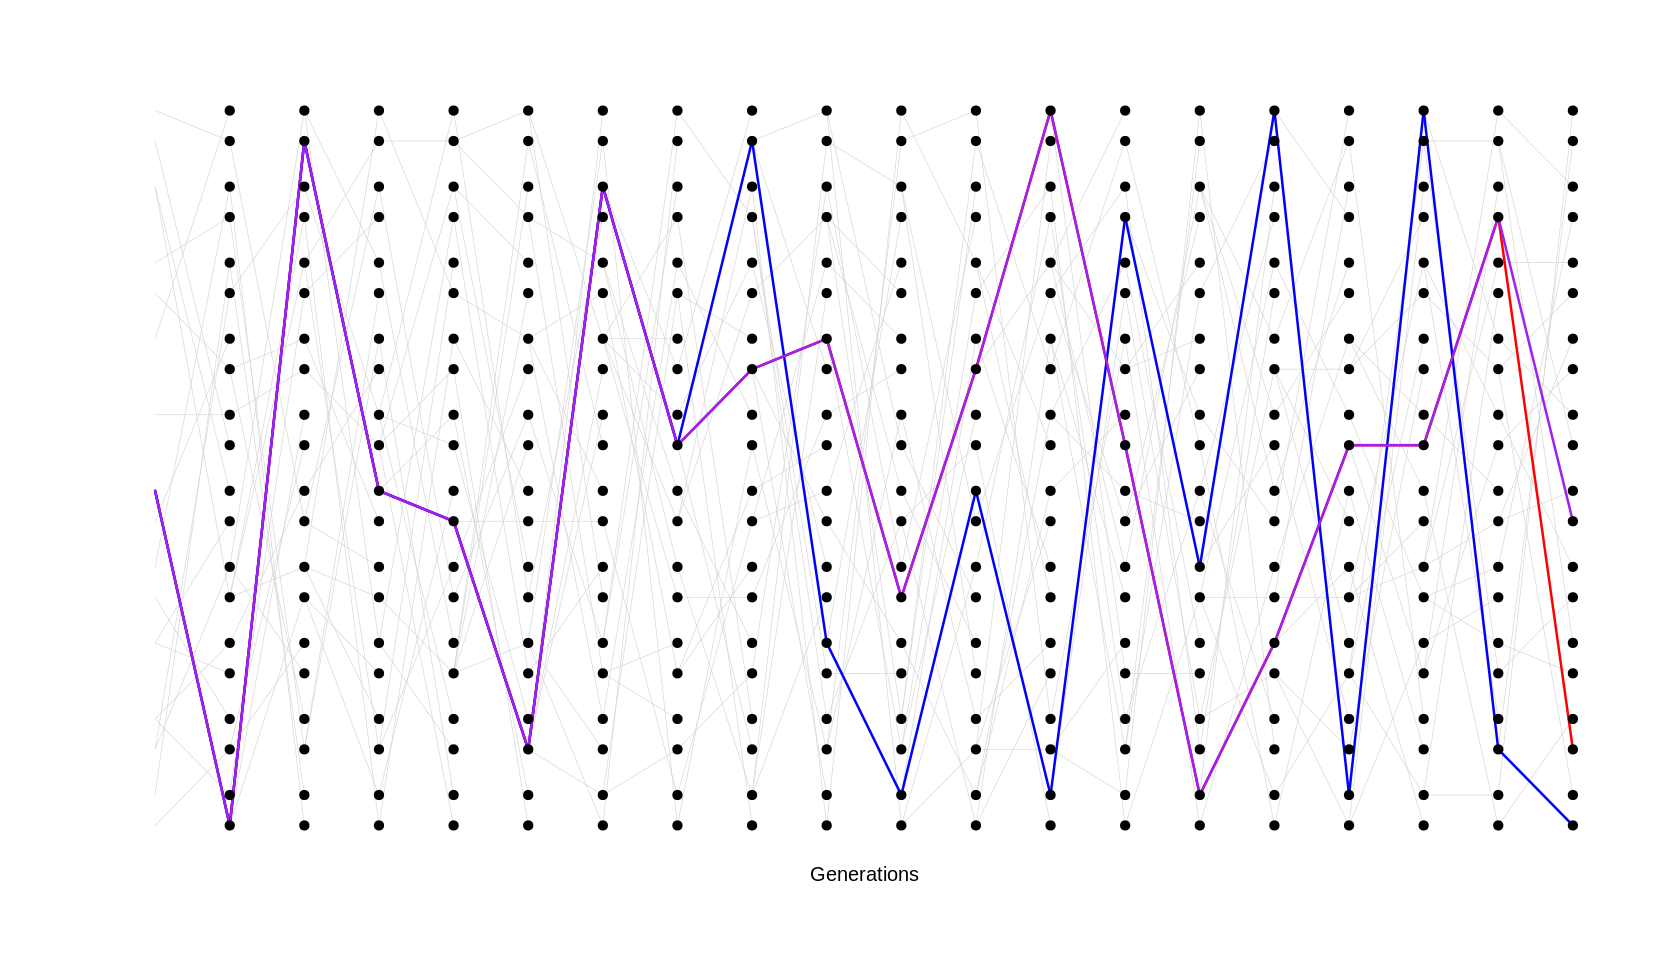

In [8]:
###Track trio of lineages
options(repr.plot.width=14, repr.plot.height=8)
track_lineages(N.vec=rep(10,20), n.iter=5, num.tracked=3, col.allele= c("red","blue","purple"))

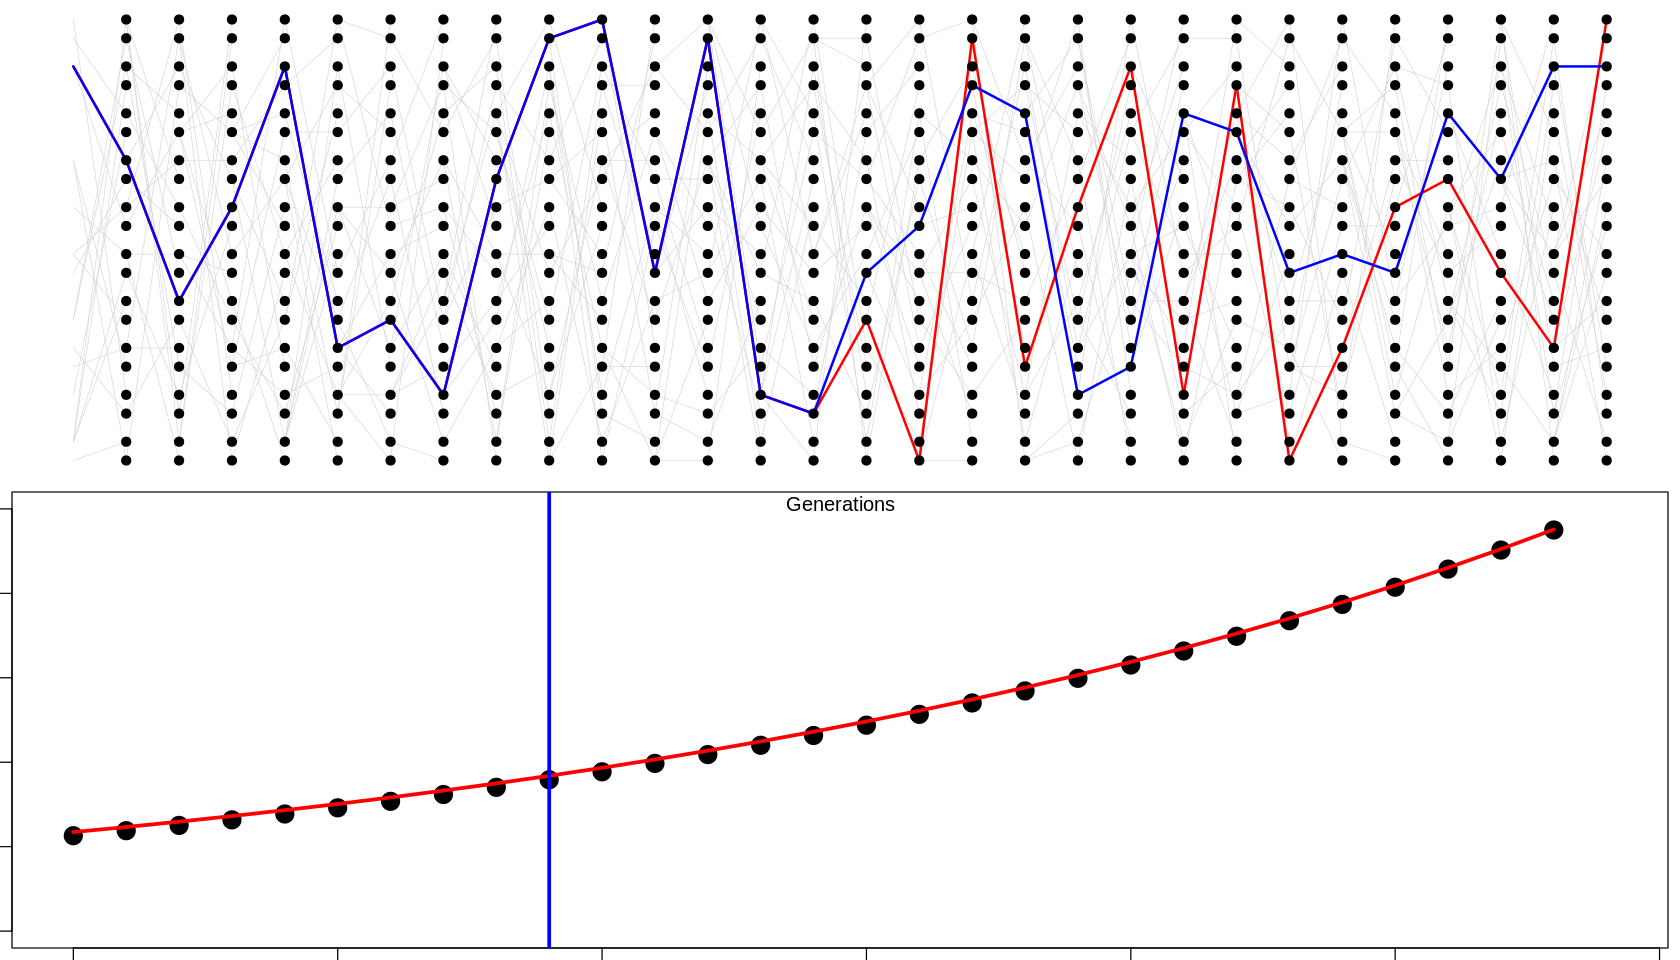

In [10]:
layout(1:2); par(mar=c(0.5,0.5,0.5,0.5))
track_lineages(N.vec=rep(10,30), n.iter=1, num.tracked=2, col.allele=c("red","blue"))
plot(-(1:30),c(NA,dgeom(1:29,1/20)),pch=19,cex=2,xlab="generations back to coalescence",ylab="Probability",ylim=c(0.0,0.05)); lines(-(1:30),c(NA,exp(-(1:29)/20)/20),col="red",lwd=3)
abline(v=-21,col="blue",lwd=3)


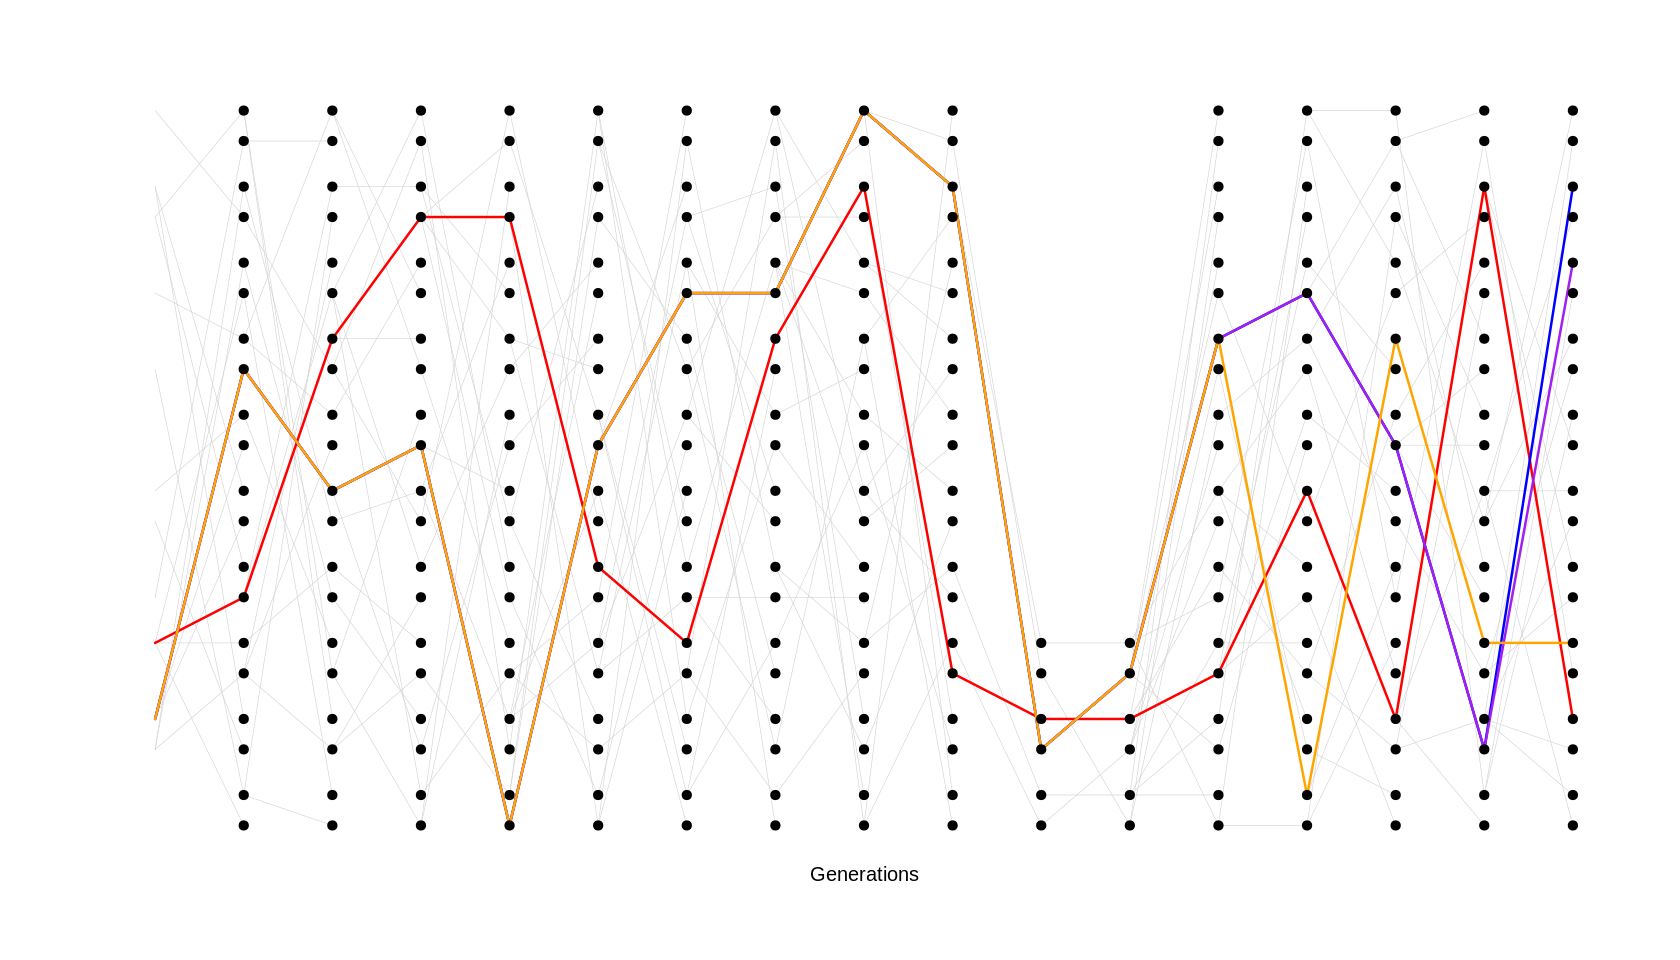

In [15]:
single.crash<- c(rep(10,10),rep(3,2),rep(10,5))
track_lineages(N.vec=single.crash, n.iter=1, num.tracked=4, col.allele= c("red","blue","purple","orange"))


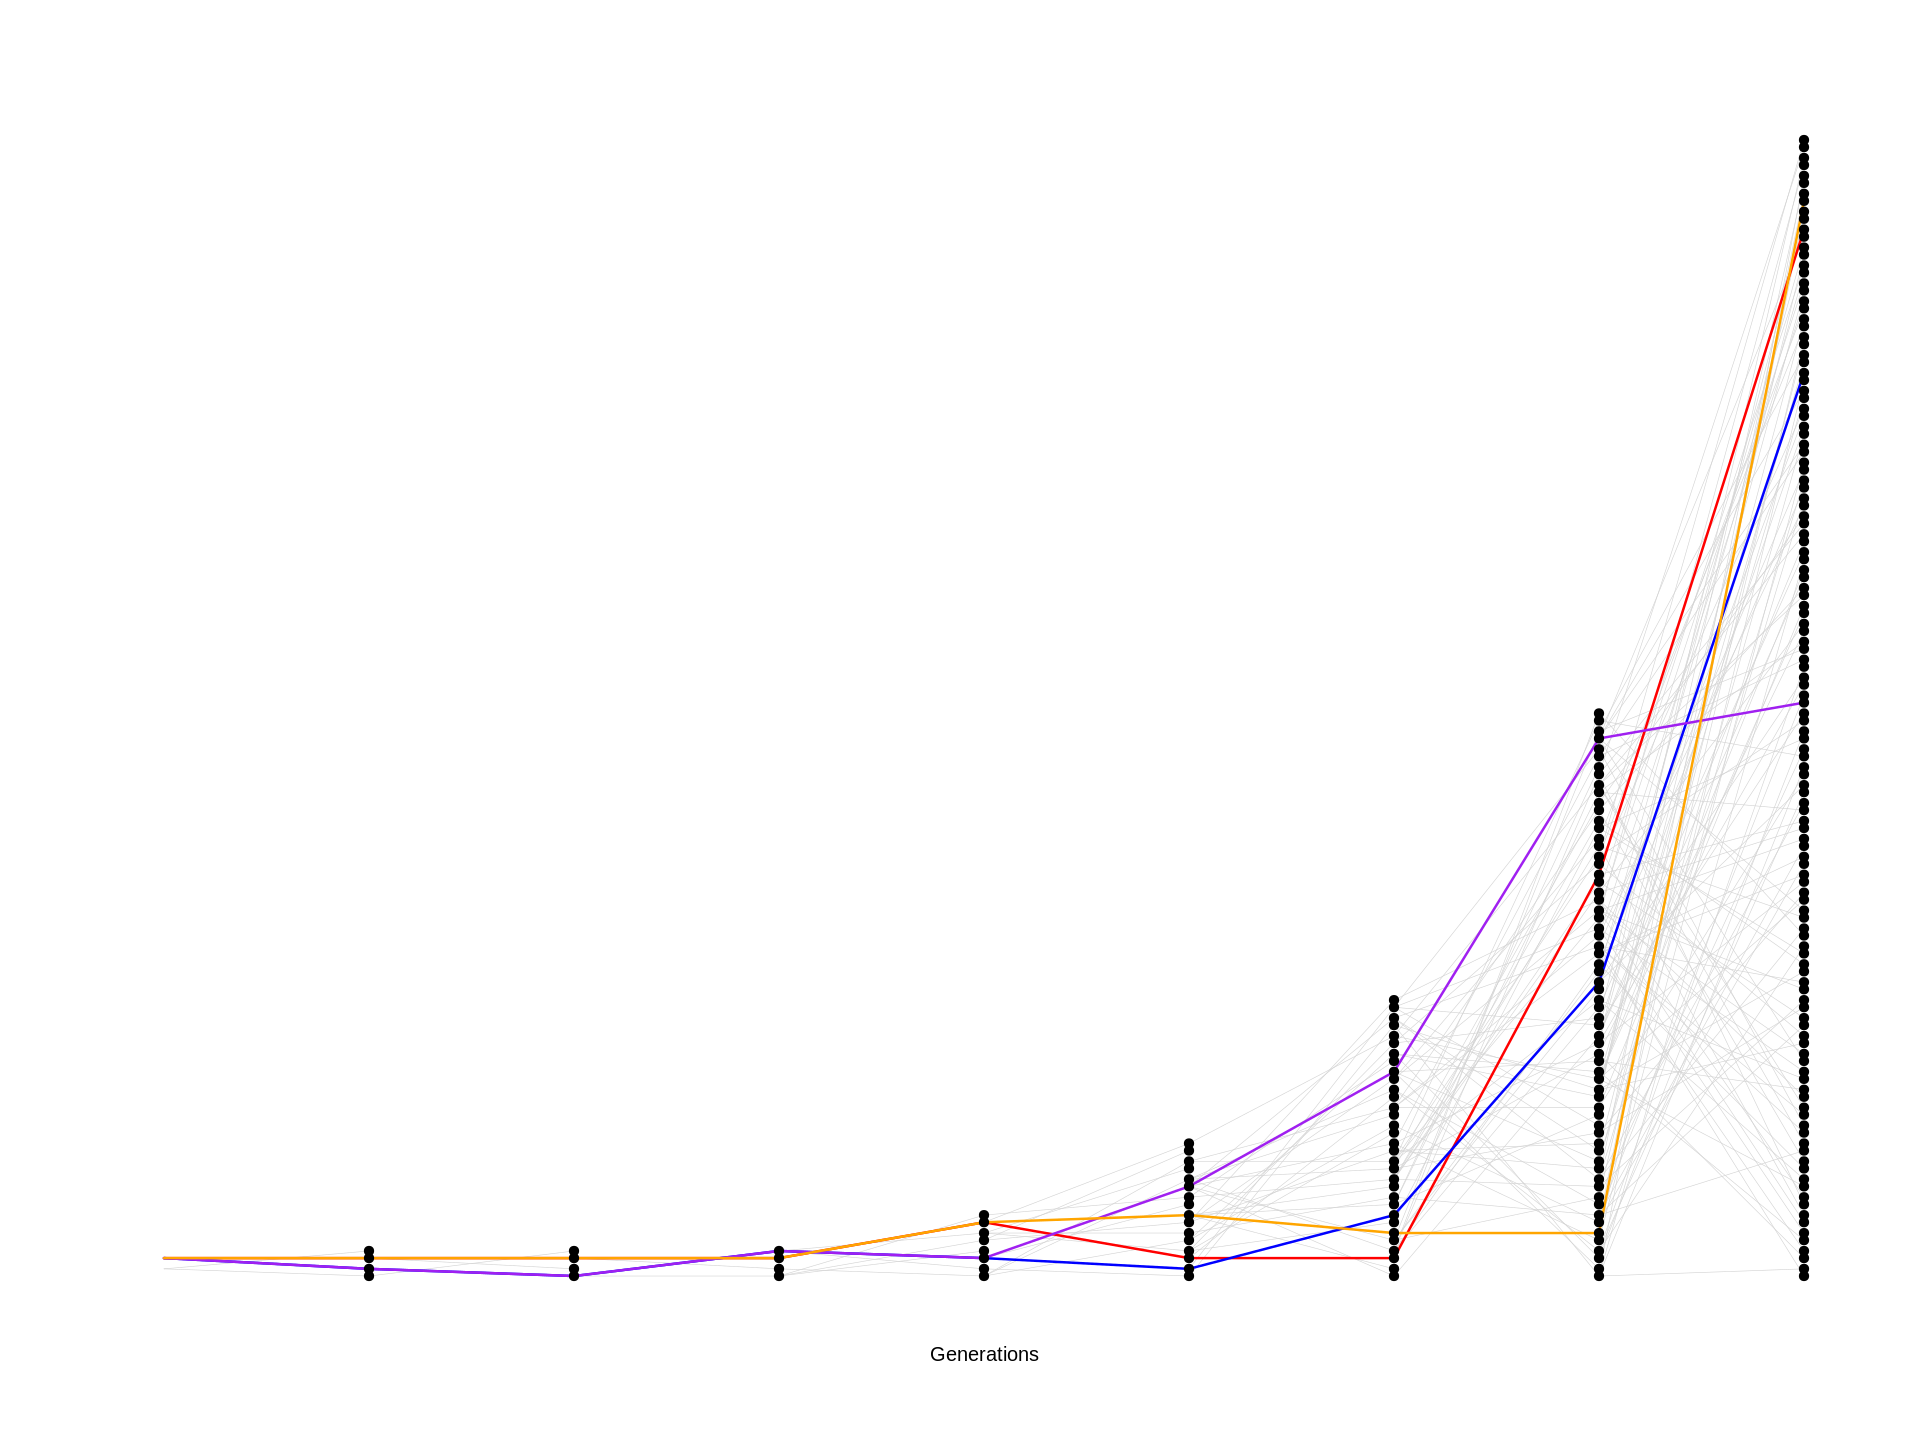

In [23]:

pop.growth<- c(rep(2,3),2^c(1:6))
options(repr.plot.width=16, repr.plot.height=12)
track_lineages(N.vec=pop.growth, n.iter=1, num.tracked=4, col.allele= c("red","blue","purple","orange"))
